In [25]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import datetime as dt
from matplotlib.ticker import FormatStrFormatter
from pylab import rcParams

In [2]:
df = pd.read_csv("../input/input_1.csv")
df

,date,sentiment,clasificacion,id
0,2021-08-01,NEUTRAL,Otro,0
1,2021-08-01,NEUTRAL,Otro,1
2,2021-08-01,NEUTRAL,Otro,2
3,2021-08-01,NEUTRAL,Otro,3
4,2021-08-01,NEUTRAL,APP,4
...,...,...,...,...
464970,2022-08-10,NEUTRAL,Otro,464970
464971,2022-08-10,POSITIVE,Otro,464971
464972,2022-08-10,NEUTRAL,Otro,464972
464973,2022-08-10,NEUTRAL,Otro,464973


In [3]:
#Se crean columnas para cada sentimiento
df['MIXED'] = np.where(df['sentiment']=='MIXED', 1, 0)
df['NEGATIVE'] = np.where(df['sentiment']=='NEGATIVE', 1, 0)
df['NEUTRAL'] = np.where(df['sentiment']=='NEUTRAL', 1, 0)
df['POSITIVE'] = np.where(df['sentiment']=='POSITIVE', 1, 0)

In [4]:
#Se agrupan por fecha
df = df.groupby(['date']).agg(
     MIXED = ('MIXED','sum'),
     NEGATIVE = ('NEGATIVE','sum'),
     NEUTRAL = ('NEUTRAL','sum'),
     POSITIVE = ('POSITIVE','sum'),
     ).reset_index()
#Se agrega una columna del total
column_names = ['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE']
df['ALL']= df[column_names].sum(axis=1)
df

,date,MIXED,NEGATIVE,NEUTRAL,POSITIVE,ALL
0,2021-08-01,81,231,2107,985,3404
1,2021-08-02,140,485,2033,970,3628
2,2021-08-03,198,686,1884,617,3385
3,2021-08-04,95,493,452,164,1204
4,2021-08-05,108,512,413,377,1410
...,...,...,...,...,...,...
370,2022-08-06,131,385,345,472,1333
371,2022-08-07,40,142,152,85,419
372,2022-08-08,121,381,239,42,783
373,2022-08-09,86,480,272,80,918


Ahora que se tiene el dataframe agrupado de forma correcta se realizarán las predicciones por diferentes metodos.  
### suavizamiento por promedios móviles

In [5]:
df['date'].size
df

,date,MIXED,NEGATIVE,NEUTRAL,POSITIVE,ALL
0,2021-08-01,81,231,2107,985,3404
1,2021-08-02,140,485,2033,970,3628
2,2021-08-03,198,686,1884,617,3385
3,2021-08-04,95,493,452,164,1204
4,2021-08-05,108,512,413,377,1410
...,...,...,...,...,...,...
370,2022-08-06,131,385,345,472,1333
371,2022-08-07,40,142,152,85,419
372,2022-08-08,121,381,239,42,783
373,2022-08-09,86,480,272,80,918


In [6]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w


df_pm = df.copy()
df_pm.drop(df_pm.index[0:14], inplace=True)
for i in column_names:
    data = np.array(df[i])
    data = moving_average(data,15)
    df_pm[i+'_p'] = data
    df_pm[i+'_e'] = df_pm[i] - df_pm[i+'_p']
    df_pm[i+'_e2'] = df_pm[i+'_e']**2
df_pm

,date,MIXED,NEGATIVE,NEUTRAL,POSITIVE,ALL,MIXED_p,MIXED_e,MIXED_e2,NEGATIVE_p,NEGATIVE_e,NEGATIVE_e2,NEUTRAL_p,NEUTRAL_e,NEUTRAL_e2,POSITIVE_p,POSITIVE_e,POSITIVE_e2
14,2021-08-15,25,229,199,43,496,136.600000,-111.600000,12454.560000,489.400000,-260.400000,67808.160000,1167.533333,-968.533333,938056.817778,696.200000,-653.200000,426670.240000
15,2021-08-16,89,548,345,116,1098,137.133333,-48.133333,2316.817778,510.533333,37.466667,1403.751111,1050.066667,-705.066667,497119.004444,638.266667,-522.266667,272762.471111
16,2021-08-17,140,565,467,153,1325,137.133333,2.866667,8.217778,515.866667,49.133333,2414.084444,945.666667,-478.666667,229121.777778,583.800000,-430.800000,185588.640000
17,2021-08-18,107,516,357,165,1145,131.066667,-24.066667,579.204444,504.533333,11.466667,131.484444,843.866667,-486.866667,237039.151111,553.666667,-388.666667,151061.777778
18,2021-08-19,73,396,302,93,864,129.600000,-56.600000,3203.560000,498.066667,-102.066667,10417.604444,833.866667,-531.866667,282882.151111,548.933333,-455.933333,207875.204444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2022-08-06,131,385,345,472,1333,107.600000,23.400000,547.560000,786.533333,-401.533333,161229.017778,296.666667,48.333333,2336.111111,109.866667,362.133333,131140.551111
371,2022-08-07,40,142,152,85,419,107.866667,-67.866667,4605.884444,783.800000,-641.800000,411907.240000,296.133333,-144.133333,20774.417778,112.733333,-27.733333,769.137778
372,2022-08-08,121,381,239,42,783,113.733333,7.266667,52.804444,800.333333,-419.333333,175840.444444,302.333333,-63.333333,4011.111111,112.666667,-70.666667,4993.777778
373,2022-08-09,86,480,272,80,918,108.800000,-22.800000,519.840000,690.333333,-210.333333,44240.111111,301.400000,-29.400000,864.360000,110.333333,-30.333333,920.111111


In [7]:
cme_pm_mixed = df_pm['MIXED_e2'].sum() / df_pm.size
cme_pm_negative = df_pm['NEGATIVE_e2'].sum() / df_pm.size
cme_pm_neutral = df_pm['NEUTRAL_e2'].sum() / df_pm.size
cme_pm_positive = df_pm['POSITIVE_e2'].sum() / df_pm.size
cme_pm_avg = (cme_pm_mixed + cme_pm_negative + cme_pm_neutral + cme_pm_positive)/4
print('CME por promedios moviles mixed: ',cme_pm_mixed)
print('CME por promedios moviles negative: ',cme_pm_negative)
print('CME por promedios moviles neutral: ',cme_pm_neutral)
print('CME por promedios moviles positive: ',cme_pm_positive)
print('CME por promedios moviles general: ',cme_pm_avg)


CME por promedios moviles mixed:  778.7455442700317
CME por promedios moviles negative:  19147.11736055538
CME por promedios moviles neutral:  6475.723797407749
CME por promedios moviles positive:  2758.0307014124005
CME por promedios moviles general:  7289.90435091139


### Suavizamiento exponencial
Como siguiente paso se compara con el metodo de suavizamiento exponencial para definir utilizar posteriormente el del mínimo error.

In [8]:
from statsmodels.tsa.api import SimpleExpSmoothing
df_se = df.copy()
for i in column_names:
    prediccion_se=SimpleExpSmoothing(df_se[i]).fit(smoothing_level=0.2,optimized=False)
    prediccion = prediccion_se.fittedvalues
    df_se[i+'_p'] = prediccion
    df_se[i+'_e'] = df_se[i] - df_se[i+'_p']
    df_se[i+'_e2'] = df_se[i+'_e']**2
df_se



,date,MIXED,NEGATIVE,NEUTRAL,POSITIVE,ALL,MIXED_p,MIXED_e,MIXED_e2,NEGATIVE_p,NEGATIVE_e,NEGATIVE_e2,NEUTRAL_p,NEUTRAL_e,NEUTRAL_e2,POSITIVE_p,POSITIVE_e,POSITIVE_e2
0,2021-08-01,81,231,2107,985,3404,81.000000,0.000000,0.000000,231.000000,0.000000,0.000000,2107.000000,0.000000,0.000000e+00,985.000000,0.000000,0.000000
1,2021-08-02,140,485,2033,970,3628,81.000000,59.000000,3481.000000,231.000000,254.000000,64516.000000,2107.000000,-74.000000,5.476000e+03,985.000000,-15.000000,225.000000
2,2021-08-03,198,686,1884,617,3385,92.800000,105.200000,11067.040000,281.800000,404.200000,163377.640000,2092.200000,-208.200000,4.334724e+04,982.000000,-365.000000,133225.000000
3,2021-08-04,95,493,452,164,1204,113.840000,-18.840000,354.945600,362.640000,130.360000,16993.729600,2050.560000,-1598.560000,2.555394e+06,909.000000,-745.000000,555025.000000
4,2021-08-05,108,512,413,377,1410,110.072000,-2.072000,4.293184,388.712000,123.288000,15199.930944,1730.848000,-1317.848000,1.736723e+06,760.000000,-383.000000,146689.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,2022-08-06,131,385,345,472,1333,106.591173,24.408827,595.790815,593.863984,-208.863984,43624.163742,283.556241,61.443759,3.775335e+03,77.964712,394.035288,155263.807803
371,2022-08-07,40,142,152,85,419,111.472939,-71.472939,5108.380971,552.091187,-410.091187,168174.781709,295.844993,-143.844993,2.069138e+04,156.771770,-71.771770,5151.186968
372,2022-08-08,121,381,239,42,783,97.178351,23.821649,567.470962,470.072950,-89.072950,7933.990360,267.075994,-28.075994,7.882615e+02,142.417416,-100.417416,10083.657435
373,2022-08-09,86,480,272,80,918,101.942681,-15.942681,254.169071,452.258360,27.741640,769.598605,261.460796,10.539204,1.110748e+02,122.333933,-42.333933,1792.161866


In [9]:
cme_se_mixed = df_se['MIXED_e2'].sum() / df_se.size
cme_se_negative = df_se['NEGATIVE_e2'].sum() / df_se.size
cme_se_neutral = df_se['NEUTRAL_e2'].sum() / df_se.size
cme_se_positive = df_se['POSITIVE_e2'].sum() / df_se.size
cme_se_avg = (cme_se_mixed + cme_se_negative + cme_se_neutral + cme_se_positive)/4
print('CME por suavizamiento exp mixed: ',cme_se_mixed)
print('CME por suavizamiento exp negative: ',cme_se_negative)
print('CME por suavizamiento exp neutral: ',cme_se_neutral)
print('CME por suavizamiento exp positive: ',cme_se_positive)
print('CME por suavizamiento exp general: ',cme_se_avg)

CME por suavizamiento exp mixed:  793.4363259654588
CME por suavizamiento exp negative:  19408.981070629834
CME por suavizamiento exp neutral:  7720.30306549731
CME por suavizamiento exp positive:  3489.0205410880158
CME por suavizamiento exp general:  7852.935250795155


Tras obtener el promedio de los cuadrados de los errores(CME) de ambos metodos se concluye que el método de promedios moviles tiene un error menor. 

In [10]:
#Se crea un nuevo df con los datos en porcentajes respecto al total
df_pred = df_pm[['date','MIXED_p', 'NEGATIVE_p', 'NEUTRAL_p', 'POSITIVE_p']].copy()
column_names = ['MIXED_p', 'NEGATIVE_p', 'NEUTRAL_p', 'POSITIVE_p']
df_pred['ALL']= df_pred[column_names].sum(axis=1)
df_pred['MIXED'] = (df_pred['MIXED_p'] / df_pred['ALL'])*100
df_pred['NEGATIVE'] = (df_pred['NEGATIVE_p'] / df_pred['ALL'])*100
df_pred['NEUTRAL'] = (df_pred['NEUTRAL_p'] / df_pred['ALL'])*100
df_pred['POSITIVE'] = (df_pred['POSITIVE_p'] / df_pred['ALL'])*100
df_pred = df_pred.drop(['MIXED_p', 'NEGATIVE_p', 'NEUTRAL_p', 'POSITIVE_p'], axis=1)
df_pred


,date,ALL,MIXED,NEGATIVE,NEUTRAL,POSITIVE
14,2021-08-15,2489.733333,5.486531,19.656724,46.893911,27.962834
15,2021-08-16,2336.000000,5.870434,21.855023,44.951484,27.323059
16,2021-08-17,2182.466667,6.283410,23.636863,43.330177,26.749549
17,2021-08-18,2033.133333,6.446536,24.815556,41.505722,27.232187
18,2021-08-19,2010.466667,6.446265,24.773684,41.476274,27.303777
...,...,...,...,...,...,...
370,2022-08-06,1300.666667,8.272681,60.471553,22.808816,8.446950
371,2022-08-07,1300.533333,8.294033,60.267583,22.770146,8.668239
372,2022-08-08,1329.066667,8.557384,60.217697,22.747793,8.477127
373,2022-08-09,1210.866667,8.985300,57.011507,24.891262,9.111931


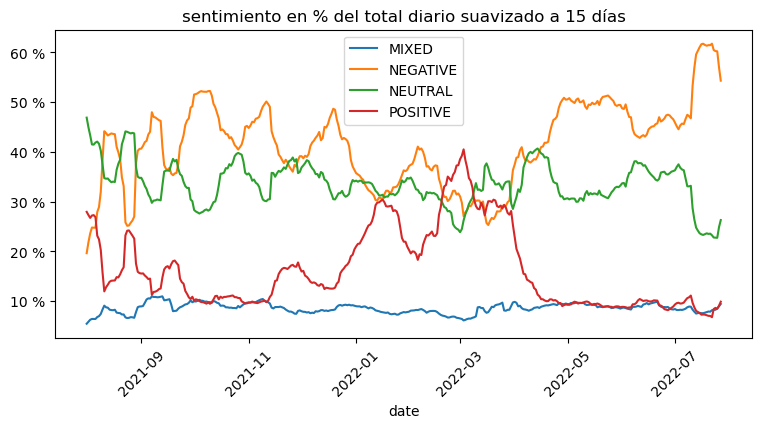

In [24]:
#Gráficar datos
rcParams['figure.figsize'] = 9, 4
fig = df_pred.plot(x='date', y=['MIXED', 'NEGATIVE', 'NEUTRAL', 'POSITIVE'])
x1 = [df_pred[df_pred.date=='2021-09-01'].first_valid_index(),
    df_pred[df_pred.date=='2021-11-01'].first_valid_index(),
    df_pred[df_pred.date=='2022-01-01'].first_valid_index(),
    df_pred[df_pred.date=='2022-03-01'].first_valid_index(),
    df_pred[df_pred.date=='2022-05-01'].first_valid_index(),
    df_pred[df_pred.date=='2022-07-01'].first_valid_index()]
label = ['2021-09','2021-11','2022-01', '2022-03','2022-05','2022-07']
fig.set_xticks(x1)
fig.set_xticklabels(label, minor=False, rotation=45)
plt.title('sentimiento en '+"%"+' del total diario suavizado a 15 días')
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d %%'))
plt.show()
